In [32]:
#Import common modules
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

<h1>Waste generated by apparel companies</h1>

<h2>Sources</h2> 

Using metrics by <b>Global Reporting Initiative</b>
Stored and published at <b>Wikirate</b> - platform reporting about over Environmental, Social, and Governance (ESG) impact of more than 145,000 companies.

In [36]:
path = 'Data sets/apparel-companies-waste-2.csv'
data = pd.read_csv(path, index_col=None)
data.head()

,Company,Year,Value,Source Page
0,Puma,2023,5595,https://wikirate.org/~18046254
1,H&M,2023,Unknown,https://wikirate.org/~19244996
2,Marks and Spencer Group plc,2023,69000,https://wikirate.org/~18045616
3,Asos,2023,Unknown,https://wikirate.org/~18087425
4,Adidas AG,2023,26382,https://wikirate.org/~18074968


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      466 non-null    object
 1   Year         466 non-null    int64 
 2   Value        466 non-null    object
 3   Source Page  466 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.7+ KB


In [38]:
path_rev = 'Data sets/Clothing_companies-revenue.csv'
df_rev = pd.read_csv(path_rev, index_col=None)
df_rev.head()

,Name,revenue_ttm,price (USD),country
0,LVMH,95238779571,675.268,France
1,Christian Dior,84937516761,627.753,France
2,TJX Companies,56421000000,126.810,United States
3,Nike Inc.,50012000000,78.850,United States
4,Inditex,39963987268,26.860,Spain


In [105]:
apparel_waste=data.drop(['Source Page'], axis=1)
apparel_waste.head(20)

,Company,Year,Value
0,Puma,2023,5595
1,H&M,2023,Unknown
2,Marks and Spencer Group plc,2023,69000
3,Asos,2023,Unknown
4,Adidas AG,2023,26382
5,Nike Inc.,2023,236984
6,Burberry Group plc,2023,Unknown
7,Inditex,2023,21606
8,Tapestry Inc,2023,Unknown
9,Guess? Inc,2023,102


In [40]:
apparel_waste = apparel_waste.replace('Unknown', np.nan)
apparel_waste['Value'] = pd.to_numeric(apparel_waste['Value'], errors='coerce')
apparel_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  466 non-null    object 
 1   Year     466 non-null    int64  
 2   Value    236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


In [111]:
apparel_waste.sort_values(by='Value', ascending=False, inplace=True)


In [42]:
apparel_waste.isnull().sum()

Company      0
Year         0
Value      230
dtype: int64

In [43]:
#Let's find outliers???
apparel_waste.describe()

,Year,Value
count,466.000000,2.360000e+02
mean,2019.482833,1.236552e+05
std,2.881294,1.204046e+06
min,2002.000000,0.000000e+00
25%,2018.000000,2.279425e+03
50%,2019.000000,1.338750e+04
75%,2022.000000,5.095635e+04
max,2023.000000,1.847804e+07


In [44]:
apparel_waste[apparel_waste['Value'] == 0]

,Company,Year,Value
108,Onward Holdings,2022,0.0


In [45]:
#we have to do this manually, because the values are too spread (I think)
apparel_waste.drop(index=199, inplace=True)
apparel_waste.drop(index=108, inplace=True)

In [46]:
apparel_waste.describe()

,Year,Value
count,464.000000,234.000000
mean,2019.476293,45746.100957
std,2.885032,100784.141019
min,2002.000000,2.984000
25%,2018.000000,2289.118200
50%,2019.000000,13387.500000
75%,2022.000000,50819.126815
max,2023.000000,691879.000000


In [47]:
apparel_waste.head(15)

,Company,Year,Value
151,Kering,2021,691879.0
128,Zalando SE,2021,680000.0
175,Carrefour S.A.,2021,672000.0
110,Carrefour S.A.,2022,587000.0
178,Primark,2021,571000.0
180,Aldi Nord,2021,381242.0
72,Fast Retailing,2022,241873.0
5,Nike Inc.,2023,236984.0
143,TJX Companies,2021,216684.0
237,Nike Inc.,2019,145434.0


In [48]:
max_value = apparel_waste['Value'].max()
apparel_waste[apparel_waste['Value'] == max_value]

,Company,Year,Value
151,Kering,2021,691879.0


In [49]:
Kering=apparel_waste[apparel_waste.Company=='Kering'].copy()
Kering

,Company,Year,Value
151,Kering,2021,691879.0
274,Kering,2019,19834.0
409,Kering,2017,19195.0
23,Kering,2023,18945.0
368,Kering,2018,18527.0
429,Kering,2016,14680.0
443,Kering,2015,13871.0
211,Kering,2020,13366.0
453,Kering,2014,12205.0


#okay, this looks wrong. Why only in one year it's tripled? 
Let's research Kering. They own Gucci, Saint Laurent, Bottega Veneta, Balenciaga, Alexander McQueen ect. In 2022 20.4 billion in revenue.
https://www.kering.com/api/download-file/?path=Kering_Environmental_Profit_and_Loss_Report_2021_EN_Only_e2a0a90be1.pdf
the value IS correct. but I assume they just counted it differently that year or...??
according to their ecological report, they produced 297,279 tones of waste in 2023...

https://kering-group.opendatasoft.com/pages/report/

In [69]:
apparel_waste_2023=apparel_waste[apparel_waste.Year==2023].copy()
apparel_waste_2023.sort_values(by=['Value'], ascending=False, inplace=True)
apparel_waste_2023

,Company,Year,Value
5,Nike Inc.,2023,236984.00
32,Burlington Stores Inc,2023,133956.00
34,Christian Dior,2023,125095.00
36,L Brands,2023,103450.00
2,Marks and Spencer Group plc,2023,69000.00
18,Gildan Activewear Inc.,2023,67000.00
17,Fast Retailing,2023,54522.00
13,Next PLC,2023,34013.00
41,Carter's Inc,2023,28868.00
40,Arvind Limited,2023,27878.78


In [71]:
apparel_waste_2023.rename(columns={'Value': 'Waste generated'}, inplace=True)

In [73]:
top_2023 = apparel_waste_2023[apparel_waste_2023['Value']> 10000]

KeyError: 'Value'

In [ ]:
#now we want this as a graph + compare to average amount of waste 
company = list(top_2023['Company'])
waste = list(top_2023['Value'])
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(company, waste, color ='blue', 
        width = 0.4)

#plt.xlabel(" ")
plt.ylabel("Metric tonnes of waste")
plt.title("Waste generated by companies in 2023")

plt.xticks(rotation=45, ha='right')  # 'ha' aligns the labels for better visibility
plt.savefig("Waste_apparel_2023.svg")

In [75]:
apparel_waste_2022=apparel_waste[apparel_waste.Year==2022].copy()
apparel_waste_2022=apparel_waste_2022.sort_values(by=['Value'], ascending=False)
apparel_waste_2022.head(40)

,Company,Year,Value
110,Carrefour S.A.,2022,587000.000000
72,Fast Retailing,2022,241873.000000
113,Kohl's,2022,137008.000000
94,Christian Dior,2022,118332.000000
54,Louis Vuitton Malletier SA (LVMH),2022,118330.000000
114,Otto Group,2022,113054.000000
81,Chico's FAS Inc,2022,110444.480000
89,Burlington Stores Inc,2022,106571.527000
51,Marks and Spencer Group plc,2022,78474.000000
86,Dick's Sporting Goods,2022,60953.000000


In [79]:
#How many companies did not give the data in 2023? 15
apparel_waste_2023.isna().sum()
Missing2023 = apparel_waste_2023['Waste generated'].isna().sum()
Missing2023

15

In [81]:
missing_percent2023 = round(Missing2023/len(apparel_waste_2023)*100)
missing_percent2023

31

In [83]:
#How many companies did not give the data in 2022? 30
Missing2022 = apparel_waste_2022['Value'].isna().sum()
Missing2022
missing_percent2022 = round(Missing2022/len(apparel_waste_2022)*100)
missing_percent2022

42

In [85]:
apparel_waste_2021=apparel_waste[apparel_waste.Year==2021].copy()
apparel_waste_2021=apparel_waste_2021.sort_values(by=['Value'], ascending=False)
Missing2021 = apparel_waste_2021['Value'].isna().sum()
missing_percent2021 = round(Missing2021/len(apparel_waste_2021)*100)
missing_percent2021


48

In [87]:
apparel_waste_2020 = apparel_waste[apparel_waste.Year==2020].copy()
Missing2020 = apparel_waste_2020['Value'].isna().sum()
missing_percent2020 = round(Missing2020/len(apparel_waste_2020)*100)
missing_percent2020

59

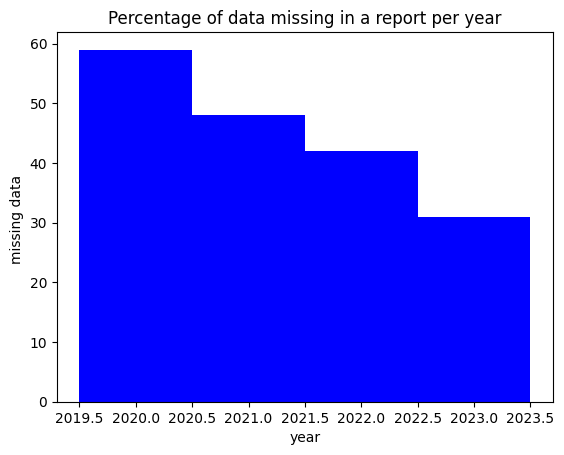

In [89]:
#let's compare missing data percentage
missing_data = [missing_percent2023, missing_percent2022, missing_percent2021, missing_percent2020]
year = [2023, 2022, 2021, 2020]
 
fig = plt.figure()

# creating the bar plot
plt.bar(year , missing_data, color ='blue', 
        width = 1)

plt.xlabel("year")
plt.ylabel("missing data ")
plt.title("Percentage of data missing in a report per year")

plt.show()

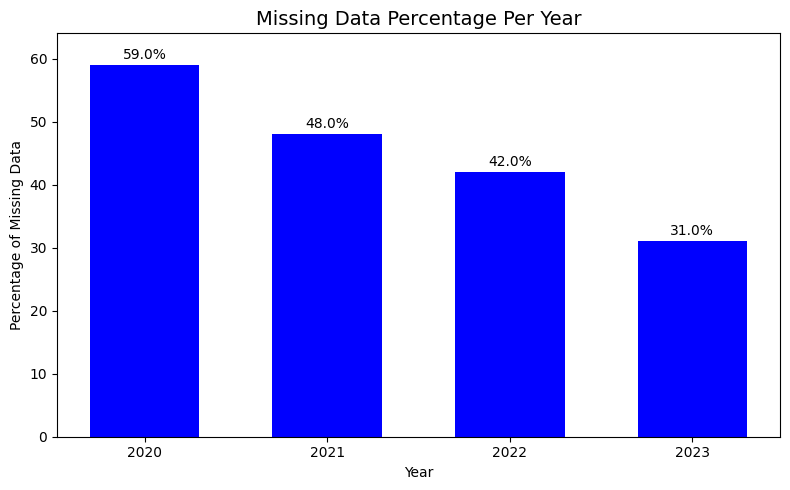

In [103]:
import matplotlib.pyplot as plt

# Data
missing_data = [missing_percent2023, missing_percent2022, missing_percent2021, missing_percent2020]
year = [2023, 2022, 2021, 2020]

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Create bar plot
bars = ax.bar(year, missing_data, color='blue', width=0.6)

# Add percentage labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', fontsize=10)


# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Missing Data")
ax.set_title("Missing Data Percentage Per Year", fontsize=14)

# Set x-axis ticks and ensure proper spacing
ax.set_xticks(year)
ax.set_ylim(0, max(missing_data) + 5)  # Add some padding above the tallest bar

# Show plot
plt.tight_layout()
plt.savefig("missing_data.svg")
plt.show()


This shows that fashion industry is becoming more transparent!

In [30]:
df_rev=df_rev.rename(columns={"Name": "Company", "revenue_ttm": "Revenue USD"})

In [31]:
df_rev

,Company,Revenue USD,price (USD),country
0,LVMH,95238779571,675.268000,France
1,Christian Dior,84937516761,627.753000,France
2,TJX Companies,56421000000,126.810000,United States
3,Nike Inc.,50012000000,78.850000,United States
4,Inditex,39963987268,26.860000,Spain
...,...,...,...,...
126,Söktas Tekstil,60183133,0.156044,Turkey
127,Perfect Moment,22374000,1.450000,United Kingdom
128,Kidpik,7783420,2.170000,United States
129,MGO Global,3715414,2.270000,United States


In [32]:
apparel_waste_2023 = apparel_waste_2023.merge(
    df_rev[['Company', 'Revenue USD']],
    on='Company',
    how='left')

In [33]:
apparel_waste_2023=data.drop(['Revenue USD_x'], axis=1)


KeyError: "['Revenue USD_x'] not found in axis"

In [34]:
apparel_waste_2023=data.drop(['Revenue USD_y'], axis=1)

KeyError: "['Revenue USD_y'] not found in axis"

In [42]:
apparel_waste_2023

,Company,Year,Value,Revenue USD
0,Nike Inc.,2023,236984.00,5.001200e+10
1,Burlington Stores Inc,2023,133956.00,1.048412e+10
2,Christian Dior,2023,125095.00,8.493752e+10
3,L Brands,2023,103450.00,NaN
4,Marks and Spencer Group plc,2023,69000.00,NaN
5,Gildan Activewear Inc.,2023,67000.00,3.231779e+09
6,Fast Retailing,2023,54522.00,2.067307e+10
7,Next PLC,2023,34013.00,6.218807e+09
8,Carter's Inc,2023,28868.00,2.842254e+09
9,Arvind Limited,2023,27878.78,9.247520e+08


In [44]:
# Drop rows with missing values (if needed)
apparel_waste_2023_clean = apparel_waste_2023.dropna()
apparel_waste_2023_clean

,Company,Year,Value,Revenue USD
0,Nike Inc.,2023,236984.00,5.001200e+10
1,Burlington Stores Inc,2023,133956.00,1.048412e+10
2,Christian Dior,2023,125095.00,8.493752e+10
5,Gildan Activewear Inc.,2023,67000.00,3.231779e+09
6,Fast Retailing,2023,54522.00,2.067307e+10
7,Next PLC,2023,34013.00,6.218807e+09
8,Carter's Inc,2023,28868.00,2.842254e+09
9,Arvind Limited,2023,27878.78,9.247520e+08
10,Adidas AG,2023,26382.00,2.464508e+10
11,Inditex,2023,21606.00,3.996399e+10


In [46]:
#correlation
correlation = apparel_waste_2023_clean['Value'].corr(apparel_waste_2023_clean['Revenue USD'])
print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: 0.6149984775839014


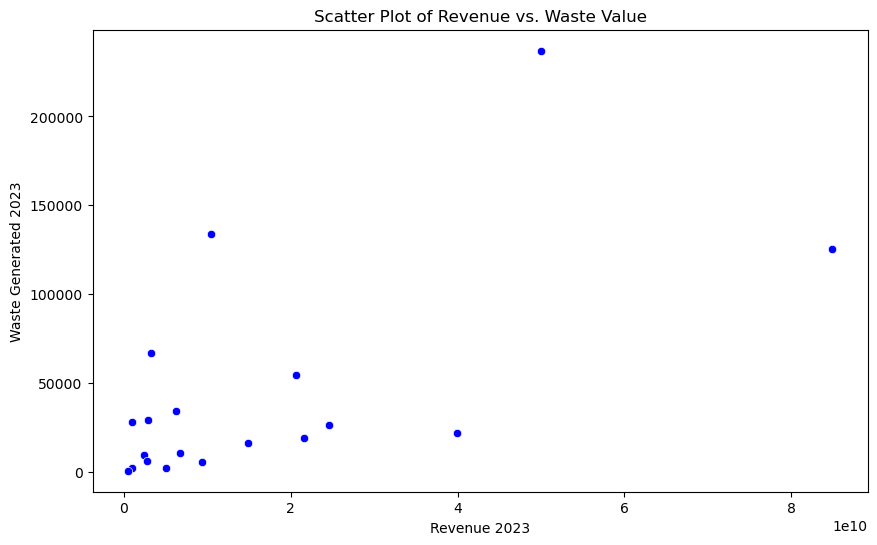

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apparel_waste_2023_clean, x='Revenue USD', y='Value', color='blue')
plt.title('Scatter Plot of Revenue vs. Waste Value')
plt.xlabel('Revenue 2023')
plt.ylabel('Waste Generated 2023')
plt.show()

TO DO

- add headlines and clarity to the notebook
- focus on kering because it's really transparent 
- chose brands with no transparency
- why H&M not reporting? 
- context of global pollution 
- corporatioins reporting more and more

In [ ]:
Christian Dior: revenue from Fashion & Leather Goods: 42 169

https://www.statista.com/statistics/1094515/share-of-the-leading-global-textile-clothing-by-country/

In [50]:
path_rec = 'Data sets/apparel-recycling.csv'
df_rec = pd.read_csv(path_rec, index_col=None)
df_rec = df_rec.replace('Unknown', np.nan)
df_rec.head()

,Company,Year,Tonnes recycled
0,Vera Bradley Inc.,2023,NaN
1,Mulberry Group Plc,2023,NaN
2,Esprit Holdings Limited,2023,NaN
3,Buckle Inc,2023,NaN
4,Capri Holdings Ltd (formerly Michael Kors),2023,NaN


In [52]:
apparel_waste_2023 = apparel_waste_2023.merge(
    df_rec[['Company', 'Tonnes recycled']],
    on='Company',
    how='left')
apparel_waste_2023

,Company,Year,Value,Revenue USD,Tonnes recycled
0,Nike Inc.,2023,236984.00,5.001200e+10,69350
1,Burlington Stores Inc,2023,133956.00,1.048412e+10,83052.72
2,Christian Dior,2023,125095.00,8.493752e+10,3561
3,L Brands,2023,103450.00,NaN,72770
4,Marks and Spencer Group plc,2023,69000.00,NaN,69000
5,Gildan Activewear Inc.,2023,67000.00,3.231779e+09,60000
6,Fast Retailing,2023,54522.00,2.067307e+10,14117.695
7,Next PLC,2023,34013.00,6.218807e+09,32297
8,Carter's Inc,2023,28868.00,2.842254e+09,19335
9,Arvind Limited,2023,27878.78,9.247520e+08,20509.93


In [56]:
apparel_waste_2023.head()

,Company,Year,Waste generated,Revenue USD,Tonnes recycled
0,Nike Inc.,2023,236984.0,5.001200e+10,69350
1,Burlington Stores Inc,2023,133956.0,1.048412e+10,83052.72
2,Christian Dior,2023,125095.0,8.493752e+10,3561
3,L Brands,2023,103450.0,NaN,72770
4,Marks and Spencer Group plc,2023,69000.0,NaN,69000


In [64]:
apparel_waste_2023.loc[apparel_waste_2023['Company'] == 'L Brands', 'Revenue USD'] = 1.572e+10

In [68]:
apparel_waste_2023['Tonnes recycled'] = apparel_waste_2023['Tonnes recycled'].astype(float)

In [70]:
apparel_waste_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          48 non-null     object 
 1   Year             48 non-null     int64  
 2   Waste generated  33 non-null     float64
 3   Revenue USD      24 non-null     float64
 4   Tonnes recycled  26 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


In [74]:
apparel_waste_2023['Recycling Rate (%)'] = (apparel_waste_2023['Tonnes recycled'] / apparel_waste_2023['Waste generated']) * 100
apparel_waste_2023

,Company,Year,Waste generated,Revenue USD,Tonnes recycled,Recycling Rate (%)
0,Nike Inc.,2023,236984.00,5.001200e+10,69350.000,29.263579
1,Burlington Stores Inc,2023,133956.00,1.048412e+10,83052.720,62.000000
2,Christian Dior,2023,125095.00,8.493752e+10,3561.000,2.846637
3,L Brands,2023,103450.00,1.572000e+10,72770.000,70.343161
4,Marks and Spencer Group plc,2023,69000.00,NaN,69000.000,100.000000
5,Gildan Activewear Inc.,2023,67000.00,3.231779e+09,60000.000,89.552239
6,Fast Retailing,2023,54522.00,2.067307e+10,14117.695,25.893575
7,Next PLC,2023,34013.00,6.218807e+09,32297.000,94.954870
8,Carter's Inc,2023,28868.00,2.842254e+09,19335.000,66.977276
9,Arvind Limited,2023,27878.78,9.247520e+08,20509.930,73.568248


All these brands work with polyester
Nearly 100% of Nike shoes contain polyester (file:///Users/katarzynasoltysiak/Downloads/FY22-NIKE,-Inc.-Impact-Report.pdf)